- **Name:** Eric B. Villaceran
- **Term:** Term 2- AY 2024-2025

# Laboratory Experiment 005: ADC and DAC Simulation

### Introduction
This notebook demonstrates the process of **Analog-to-Digital Conversion (ADC)** and **Digital-to-Analog Conversion (DAC)** using a sine wave as the input signal. The process includes:
1. **Generating an analog signal** (sine wave)
2. **Simulating ADC** - Sampling and Quantization
3. **Simulating DAC** - Reconstruction using Zero-Order Hold (ZOH)
4. **Visualizing the results**

---

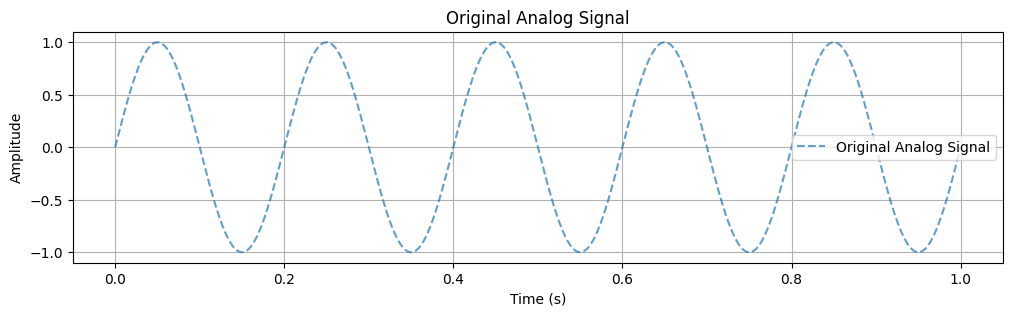

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Generate a continuous analog signal (sine wave)
sampling_rate = 1000  # Hz
signal_frequency = 5  # Hz
duration = 1  # second
t = np.linspace(0, duration, sampling_rate * duration)
analog_signal = np.sin(2 * np.pi * signal_frequency * t)

# Plot Original Analog Signal
plt.figure(figsize=(12, 3))
plt.plot(t, analog_signal, label="Original Analog Signal", linestyle='dashed', alpha=0.7)
plt.title("Original Analog Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

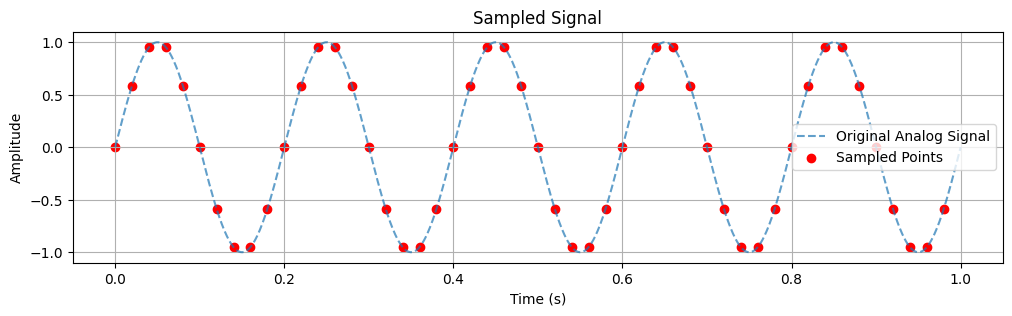

In [2]:
# Simulate ADC: Sampling and Quantization
adc_sampling_rate = 50  # Sampling rate for ADC
sample_times = np.linspace(0, duration, adc_sampling_rate * duration, endpoint=False)
sampled_signal = np.sin(2 * np.pi * signal_frequency * sample_times)
quantization_levels = 16
quantized_signal = np.round((sampled_signal + 1) * (quantization_levels / 2)) / (quantization_levels / 2) - 1

# Plot Sampled Signal
plt.figure(figsize=(12, 3))
plt.plot(t, analog_signal, linestyle='dashed', alpha=0.7, label="Original Analog Signal")
plt.scatter(sample_times, sampled_signal, color='red', label="Sampled Points")
plt.title("Sampled Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

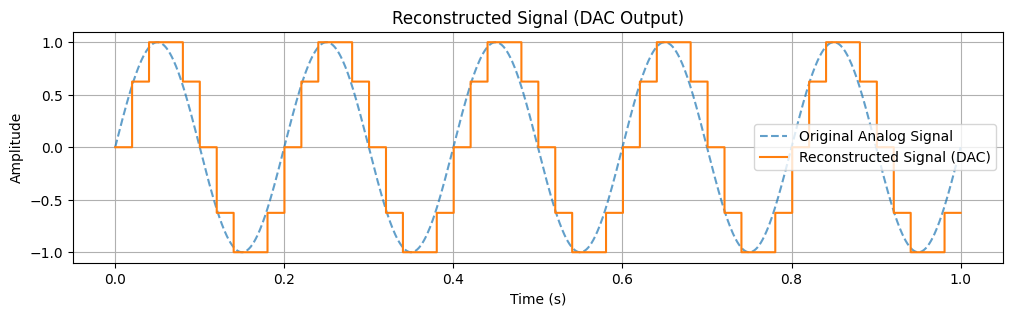

In [3]:
# Simulate DAC: Reconstruction using Zero-Order Hold (ZOH)
dac_reconstructed_signal = np.repeat(quantized_signal, int(sampling_rate / adc_sampling_rate))
dac_time = np.linspace(0, duration, len(dac_reconstructed_signal))

# Plot Reconstructed Signal (DAC Output)
plt.figure(figsize=(12, 3))
plt.plot(t, analog_signal, linestyle='dashed', alpha=0.7, label="Original Analog Signal")
plt.step(dac_time, dac_reconstructed_signal, label="Reconstructed Signal (DAC)", where='post')
plt.title("Reconstructed Signal (DAC Output)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

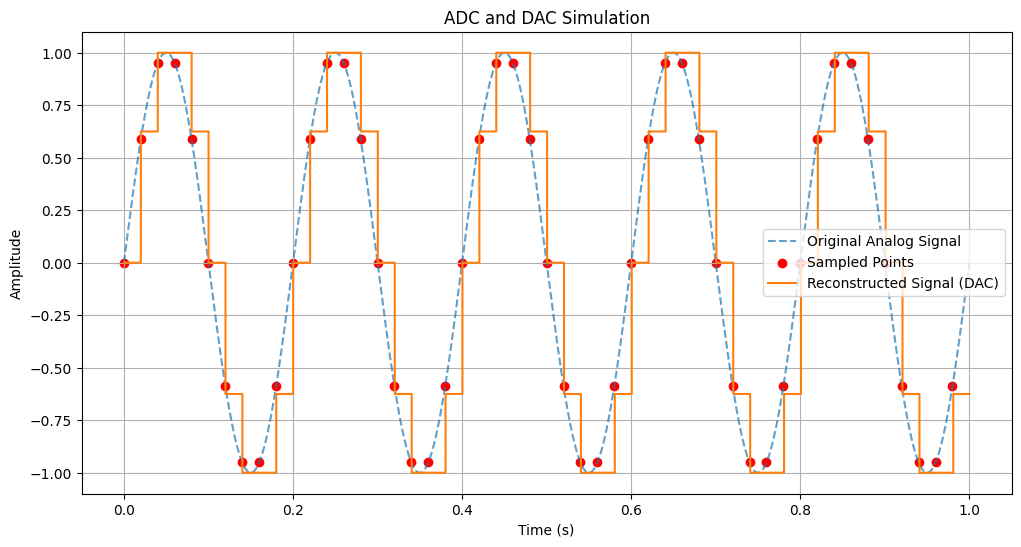

In [4]:
# Plot Original, Sampled, and Reconstructed Signals
plt.figure(figsize=(12, 6))
plt.plot(t, analog_signal, label="Original Analog Signal", linestyle='dashed', alpha=0.7)
plt.scatter(sample_times, sampled_signal, color='red', label="Sampled Points")
plt.step(dac_time, dac_reconstructed_signal, label="Reconstructed Signal (DAC)", where='post')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("ADC and DAC Simulation")
plt.legend()
plt.grid()
plt.show()

### Explanation
- **Analog Signal Generation**: A continuous sine wave is created to simulate an analog signal.
- **ADC Process**:
  - **Sampling**: The analog signal is sampled at discrete time intervals.
  - **Quantization**: The sampled values are rounded to the nearest discrete levels based on the number of quantization levels.
- **DAC Process**:
  - **Reconstruction**: The quantized signal is reconstructed using Zero-Order Hold (ZOH), where each sampled value is held constant until the next sample.
- **Visualization**:
  - The original analog signal is plotted as a dashed line.
  - The sampled points are marked as red dots.
  - The reconstructed signal is displayed as a step function showing the DAC output.

This simulation provides insight into the effects of sampling and quantization in ADC and how DAC reconstructs the original signal from the discrete data.

---

### Conclusion
- Higher **sampling rates** result in better representation of the original signal.
- More **quantization levels** lead to reduced quantization error and a more accurate digital representation.
- **Zero-Order Hold (ZOH)** reconstruction provides a piecewise constant approximation of the analog signal.
- Understanding ADC and DAC processes is essential in applications like audio processing, signal transmission, and digital control systems.
